<a href="https://colab.research.google.com/github/patchacha/FTW-HW-on-Pandas-and-Matplotlib/blob/main/Pandas_HW_PP_100220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Load necessary libraries

import os
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import warnings
warnings.filterwarnings('ignore')

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

%matplotlib inline 

In [ ]:
# Upload the dataset from local computer to colab

from google.colab import files
files.upload()

We'll be checking the cleaned dataset from an insurance data containing age, sex, BMI, no. of children, region and charges. 

In [38]:
# Load the insurance.csv data set

insurance_df = pd.read_csv('insurance_regression.csv')
print(insurance_df.shape) #to check number of rows and columns
insurance_df.info() #check each column and data type 


(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
pd.options.display.width=0 #for pandas to autodetect size of window
insurance_df.head() #show a summary of data, first 5

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
insurance_df.tail() #show last 5 rows

,age,sex,bmi,children,smoker,region,charges
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
877,33,male,33.440,5,no,southeast,6653.78860
1130,39,female,23.870,5,no,southeast,8582.30230
937,39,female,24.225,5,no,northwest,8965.79575


In [35]:
insurance_df.index

Int64Index([ 172,  629,  772,  155,  318,  675,   81,  805,  933,  488,
            ...
              32, 1085,  640,   71,  568,  413,  425,  877, 1130,  937],
           dtype='int64', length=1338)

In [36]:
insurance_df.columns #shows column names 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
insurance_df.describe() #to calculate statistical data of numerical values of the dataframe, here only the age, bmi, children and charges have numerical value

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
#sort data with age in ascending order 
insurance_df.sort_values(by=['age'], inplace=True)
display(insurance_df)

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
822,18,female,31.130,0,no,southeast,1621.88270
369,18,male,30.400,3,no,northeast,3481.86800
1150,18,female,30.305,0,no,northeast,2203.73595
808,18,male,30.140,0,no,southeast,1131.50660
...,...,...,...,...,...,...,...
635,64,male,38.190,0,no,northeast,14410.93210
825,64,female,31.825,2,no,northeast,16069.08475
890,64,female,26.885,0,yes,northwest,29330.98315
62,64,male,24.700,1,no,northwest,30166.61817


In [28]:
#sort data with bmi in ascending order 
insurance_df.sort_values(by=['bmi'], inplace=True)
display(insurance_df)

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
428,21,female,16.815,1,no,northeast,3167.45585
1226,38,male,16.815,2,no,northeast,6640.54485
412,26,female,17.195,2,yes,northeast,14455.64405
1286,28,female,17.290,0,no,northeast,3732.62510
...,...,...,...,...,...,...,...
286,46,female,48.070,2,no,northeast,9432.92530
116,58,male,49.060,0,no,southeast,11381.32540
847,23,male,50.380,1,no,southeast,2438.05520
1047,22,male,52.580,1,yes,southeast,44501.39820


In [30]:
#sort data with number of children in ascending order 
insurance_df.sort_values(by=['children'], inplace=True)
display(insurance_df)

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
629,44,female,38.950,0,yes,northwest,42983.45850
772,44,female,36.480,0,no,northeast,12797.20962
155,44,male,39.520,0,no,northwest,6948.70080
318,44,female,27.645,0,no,northwest,7421.19455
...,...,...,...,...,...,...,...
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
877,33,male,33.440,5,no,southeast,6653.78860
1130,39,female,23.870,5,no,southeast,8582.30230


In [ ]:
insurance_df['sex'].value_counts(ascending=True) #counts number of female and male 


female    662
male      676
Name: sex, dtype: int64

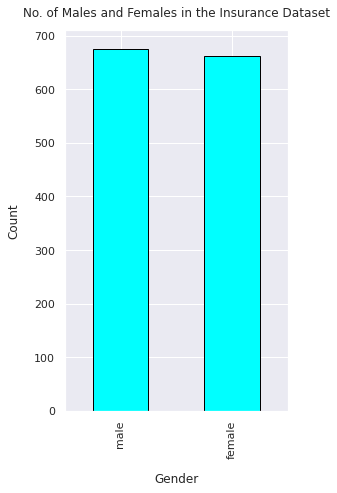

In [ ]:
sns.set(font_scale=1)
barplot1 = insurance_df['sex'].value_counts(ascending=False).plot(kind='bar', figsize=(4,7), color='cyan', edgecolor = 'black')
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title('No. of Males and Females in the Insurance Dataset', y=1.02)
plt.show()

In [ ]:
insurance_df['smoker'].value_counts(ascending=True)


yes     274
no     1064
Name: smoker, dtype: int64

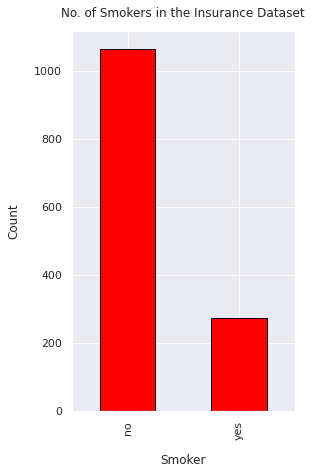

In [ ]:
sns.set(font_scale=1)
barplot2 = insurance_df['smoker'].value_counts(ascending=False).plot(kind='bar', figsize=(4,7), color='red', edgecolor = 'black')
plt.xlabel("Smoker", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title('No. of Smokers in the Insurance Dataset', y=1.02)
plt.show()

In [ ]:
insurance_df['region'].value_counts(ascending=True)


northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

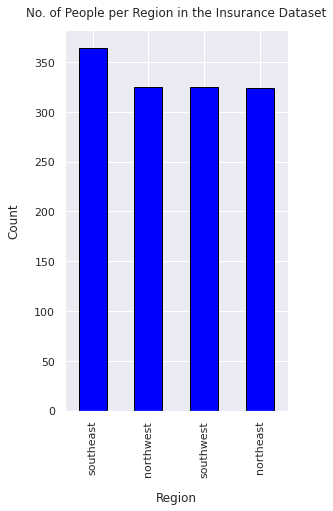

In [ ]:
sns.set(font_scale=1)
barplot3 = insurance_df['region'].value_counts(ascending=False).plot(kind='bar', figsize=(4,7), color='blue', edgecolor = 'black')
plt.xlabel("Region", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title('No. of People per Region in the Insurance Dataset', y=1.02)
plt.show()

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot()

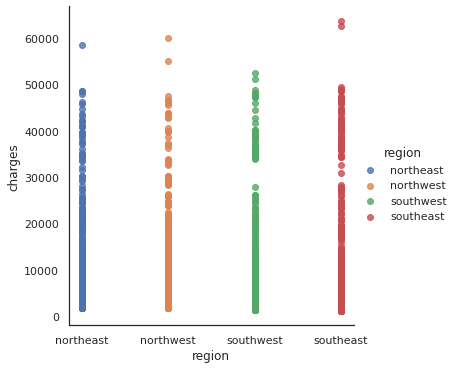

In [33]:
sns.lmplot(data=insurance_df, x="region", y="charges", fit_reg=False, hue="region")

In [ ]:
insurance_df['children'].value_counts(ascending=False)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

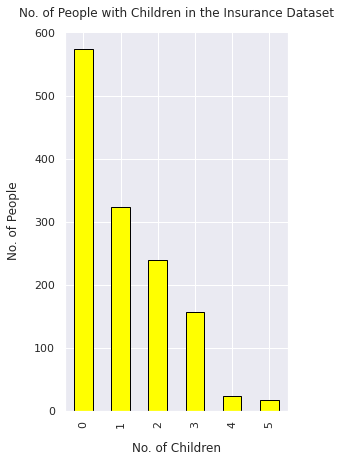

In [ ]:
sns.set(font_scale=1)
barplot4 = insurance_df['children'].value_counts(ascending=False).plot(kind='bar', figsize=(4,7), color='yellow', edgecolor = 'black')
plt.xlabel("No. of Children", labelpad=14)
plt.ylabel("No. of People", labelpad=14)
plt.title('No. of People with Children in the Insurance Dataset', y=1.02)
plt.show()

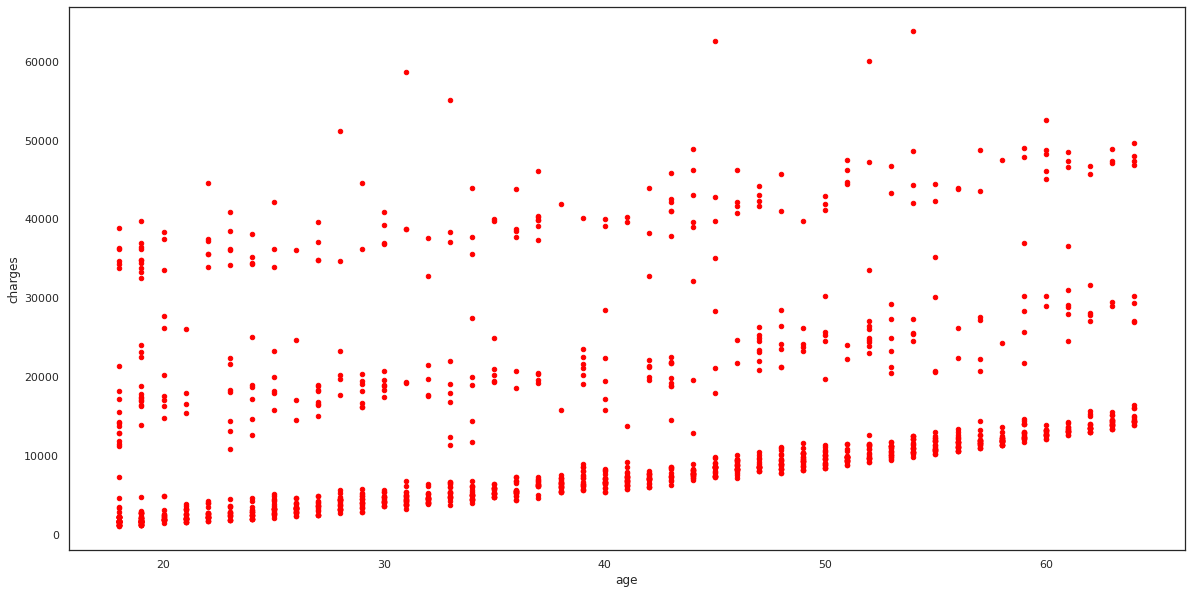

In [ ]:
insurance_df.plot(kind='scatter',x='age',y='charges',color='red')
plt.show()

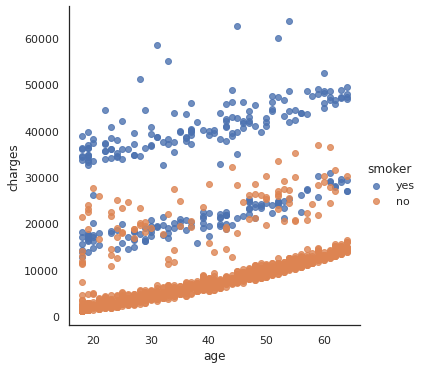

In [54]:
vis4 = sns.lmplot(data=insurance_df, x = "age" , y ="charges", fit_reg = False , hue = "smoker")
plt.show()

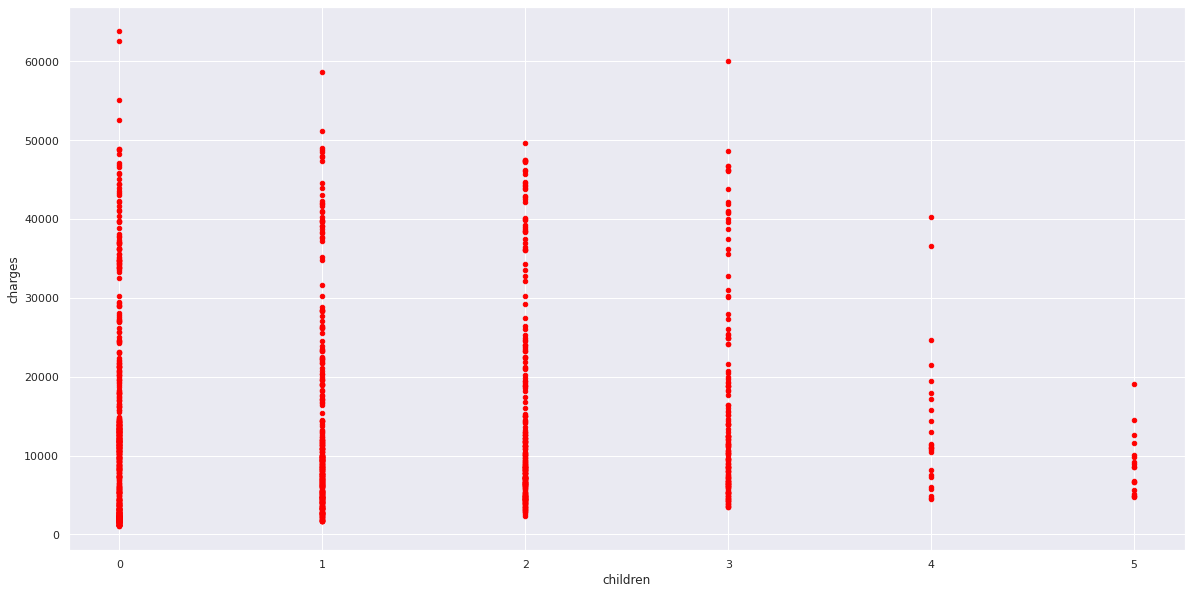

In [ ]:
insurance_df.plot(kind='scatter',x='children',y='charges',color='red')
plt.show()

In [62]:
insurance_df.plot(kind='scatter',x='bmi',y='charges',label=name)
plt.show()
plt.legend()

NameError: ignored

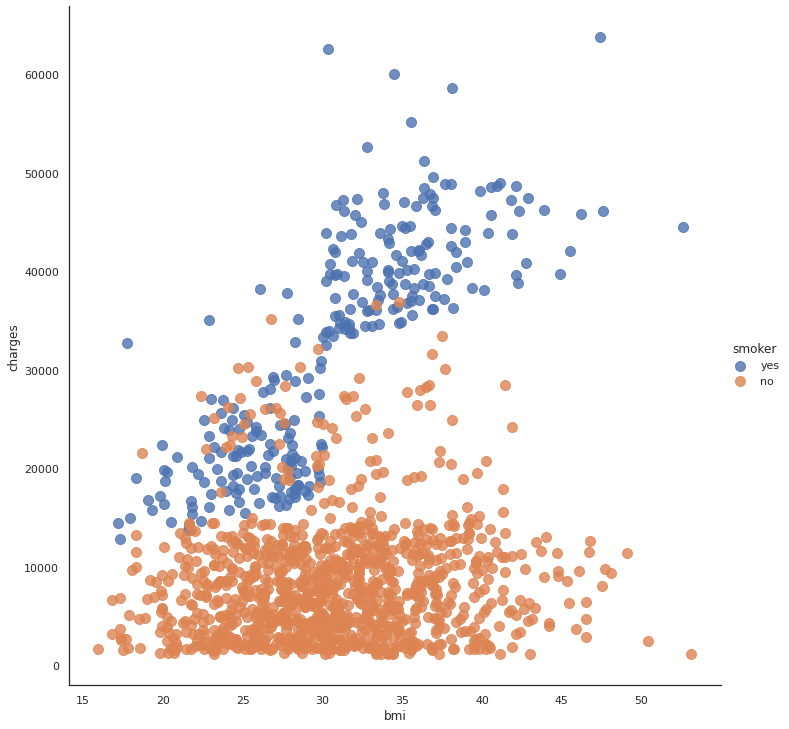

In [72]:
vis3 = sns.lmplot(data=insurance_df, x = "bmi" , y ="charges", fit_reg = False , hue = "smoker",  size= 10, aspect = 1, scatter_kws = {"s" :100})
plt.show()

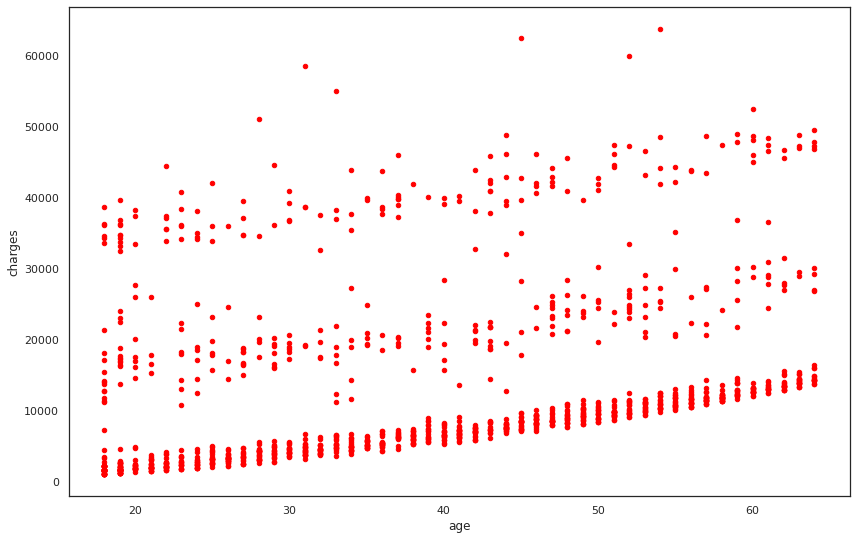

In [51]:
insurance_df.plot(kind='scatter',x='age',y='charges',color='red')
plt.show()

In [ ]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

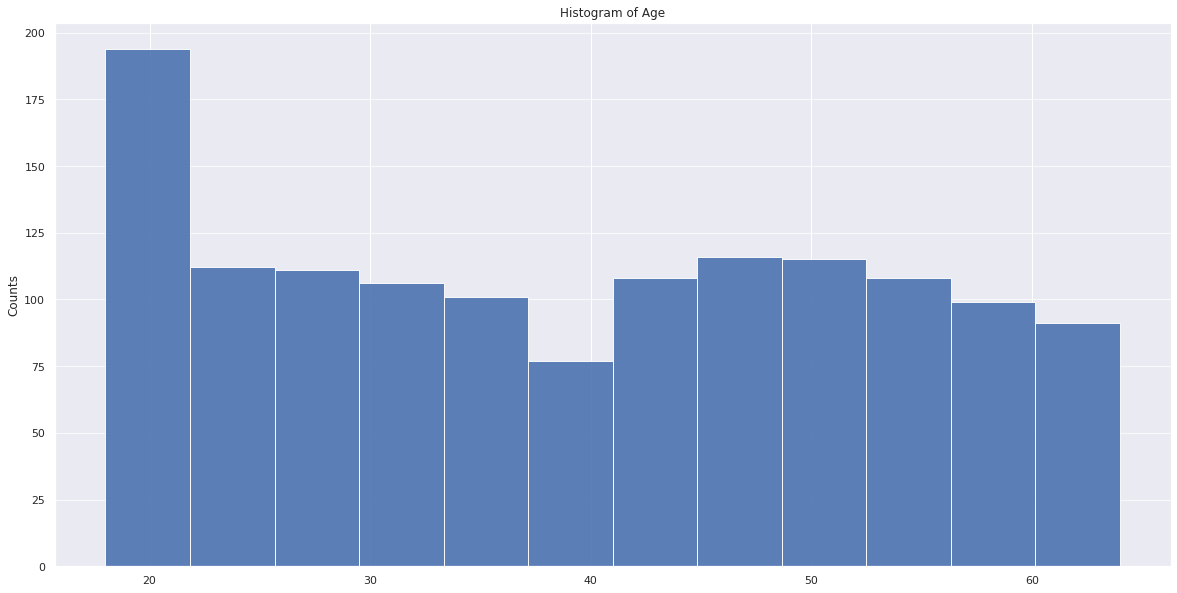

In [ ]:
insurance_df['age'].hist(bins='auto', alpha=0.9)
plt.title('Histogram of Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()

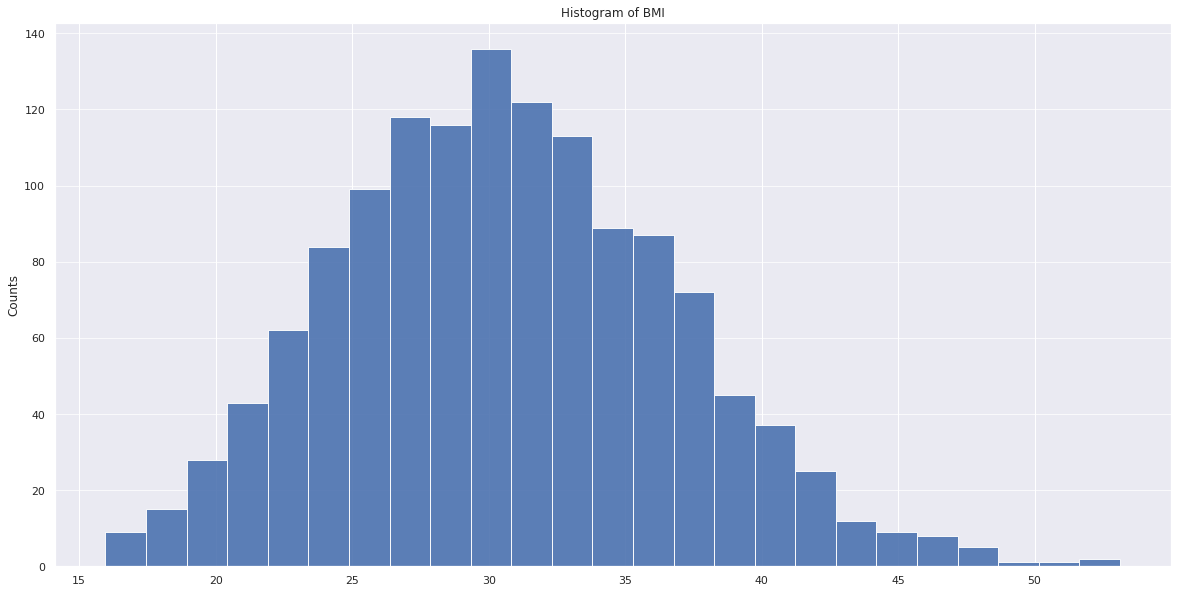

In [ ]:
insurance_df['bmi'].hist(bins='auto', alpha=0.9)
plt.title('Histogram of BMI')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()


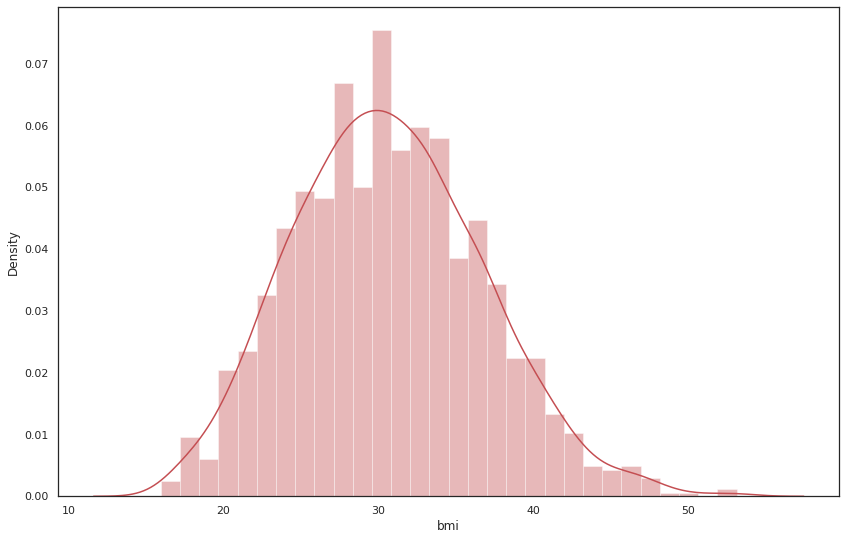

In [50]:
plt.rcParams["figure.figsize"]=14,9
vis1=sns.distplot(insurance_df["bmi"],bins=30,color='r')

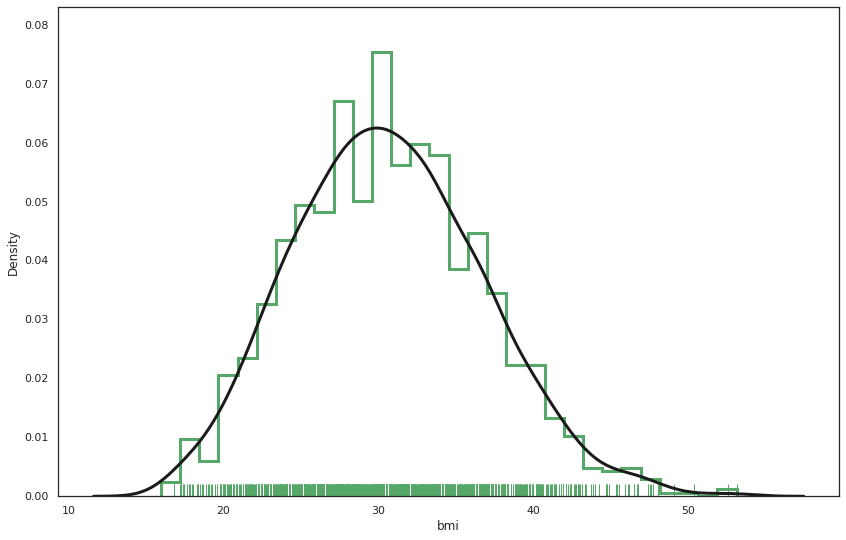

In [49]:
plt.rcParams["figure.figsize"]=14,9
vis1=sns.distplot(insurance_df["bmi"],bins=30,rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

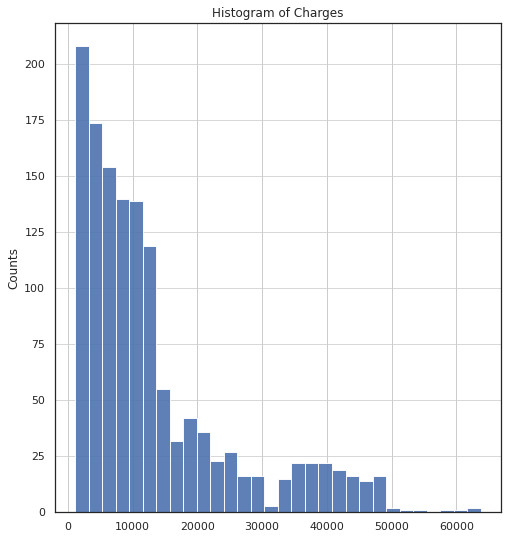

In [42]:
insurance_df['charges'].hist(bins='auto', alpha=0.9)
plt.title('Histogram of Charges')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()

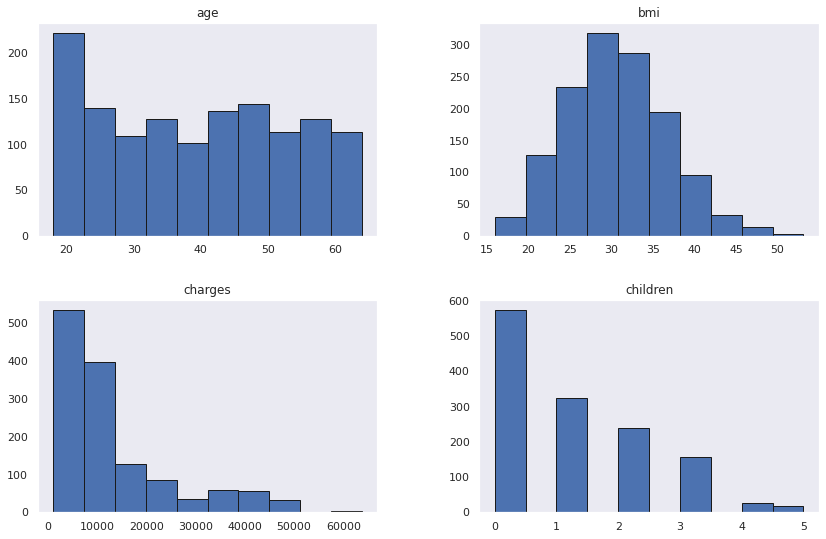

In [ ]:
insurance_df[['age','bmi','charges','children']].hist(figsize=(14, 9),bins=10,linewidth='1',edgecolor='k',grid=False)
plt.show()

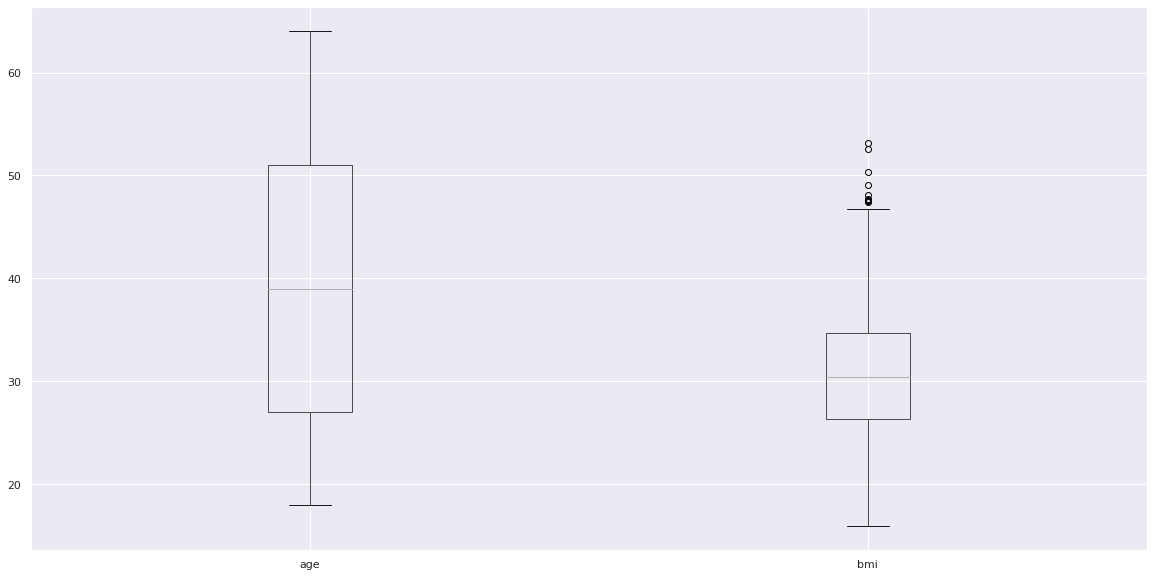

In [ ]:
insurance_df.boxplot(column=['age','bmi'])
plt.show()

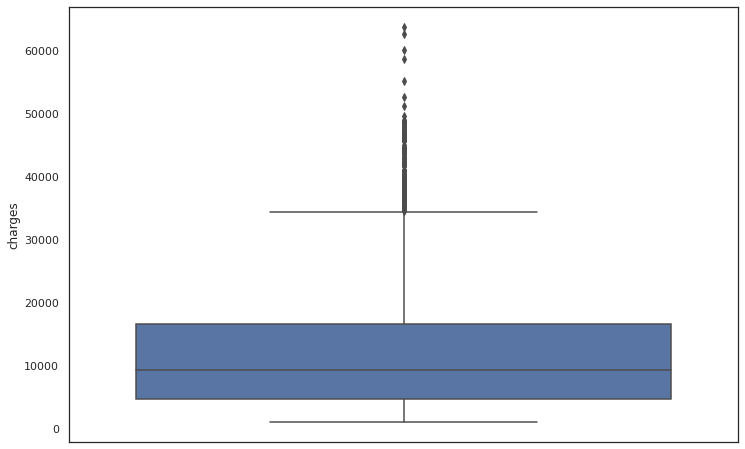

In [74]:
vis2=sns.boxplot(data=insurance_df, y='charges')

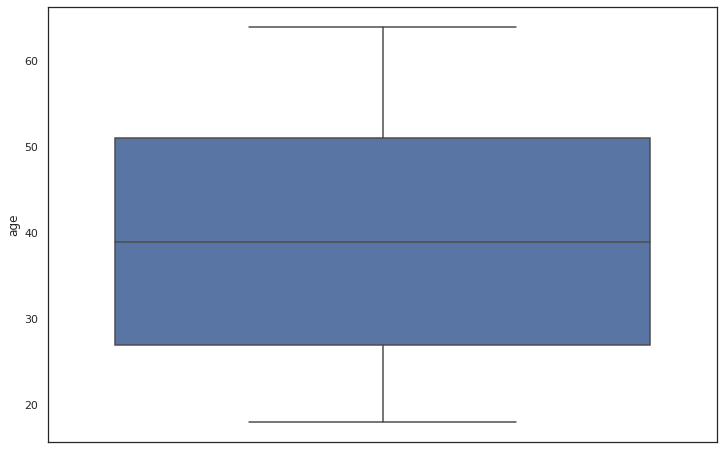

In [75]:
vis2=sns.boxplot(data=insurance_df, y='age')

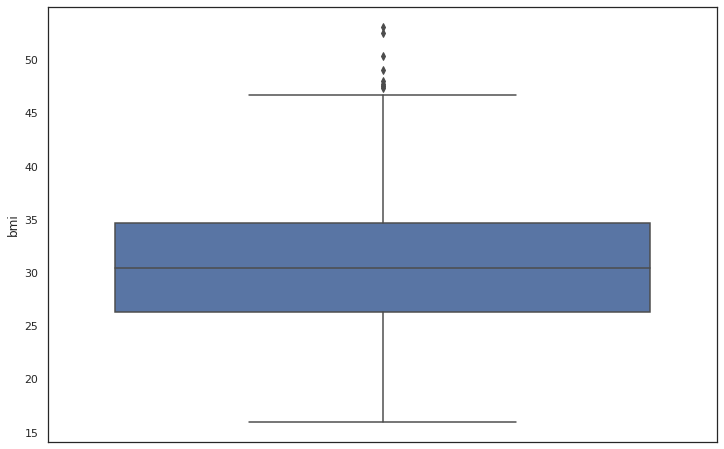

In [76]:
vis2=sns.boxplot(data=insurance_df, y='bmi')